In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split, cross_val_score
 from sklearn.linear_model import LinearRegression
 from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("Banglore Housing Prices.csv")

In [3]:
 df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [4]:
df.shape

(13320, 5)

In [5]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [7]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df['size'] = [int(value.split(' ')[0]) for value in df['size']]

In [11]:
 df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [12]:
df['total_sqft'].info() #Transferring 'total_sqft' column

<class 'pandas.core.series.Series'>
Index: 13246 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype 
--------------  ----- 
13246 non-null  object
dtypes: object(1)
memory usage: 207.0+ KB


In [13]:
def convert_sqft(value):
    try:
        if '-' in value:
             # If the value is a range, take the average
             start, end = map(float, value.split('-'))
             return (start + end) / 2
        else:
             # If the value is a single number, convert it to float
             return float(value)
    except ValueError:
         return float('nan')

In [14]:
 df['total_sqft'] = [convert_sqft(value) for value in df['total_sqft']]

In [15]:
df['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64

In [16]:
 df['total_sqft'].isnull().sum()

46

In [17]:
df.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
dtype: int64

In [18]:
 df.dropna(inplace = True)

In [19]:
 df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [20]:
 df['Price_per_sqft'] = df['price']/df['total_sqft'] #Adding one more column as ‘Price_Per_Sqft’

In [21]:
df.head()

,location,size,total_sqft,bath,price,Price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,0.036998
1,Chikka Tirupathi,4,2600.0,5.0,120.00,0.046154
2,Uttarahalli,3,1440.0,2.0,62.00,0.043056
3,Lingadheeranahalli,3,1521.0,3.0,95.00,0.062459
4,Kothanur,2,1200.0,2.0,51.00,0.042500


In [22]:
selected_columns = ['Price_per_sqft', 'size']
outliers = df[selected_columns]  #Checking and Removing Outliers

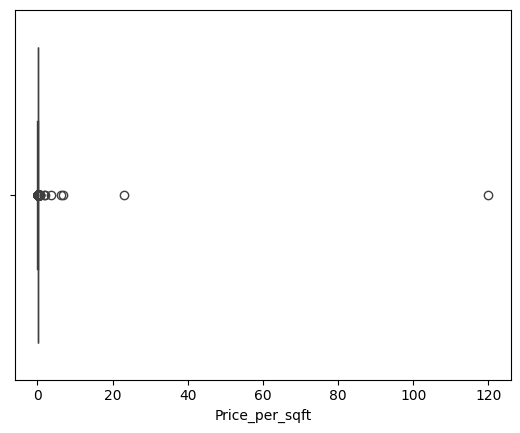

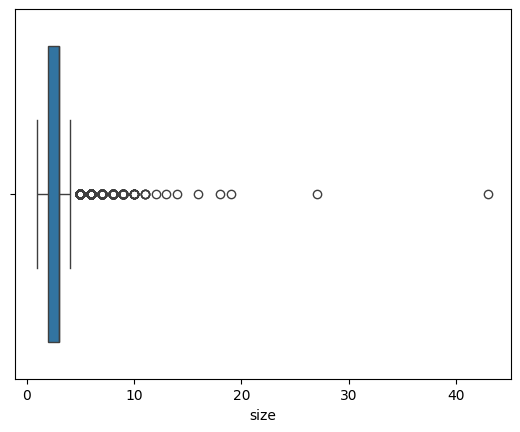

In [23]:
for i in outliers:
 sns.boxplot(x=df[i])
 plt.show()

In [24]:
def remove_outliers(column):
 Q1 = column.quantile(0.25)
 Q3 = column.quantile(0.75)
 IQR = Q3- Q1
 lower_bound = Q1- 1.5 * IQR
 upper_bound = Q3 + 1.5 * IQR
 return column[(column >= lower_bound) & (column <= upper_bound)]

In [25]:
df['Price_per_sqft'] = remove_outliers(df['Price_per_sqft'])

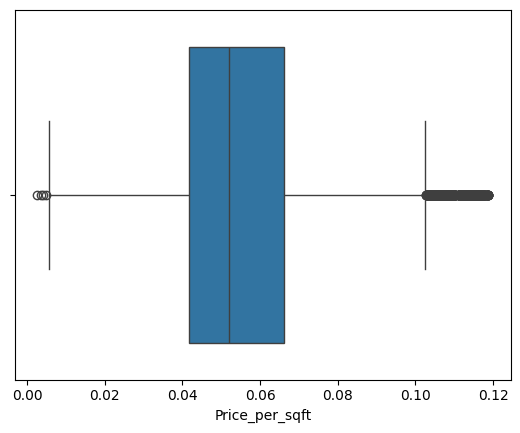

In [26]:
 sns.boxplot(x=df['Price_per_sqft'])
 plt.show()

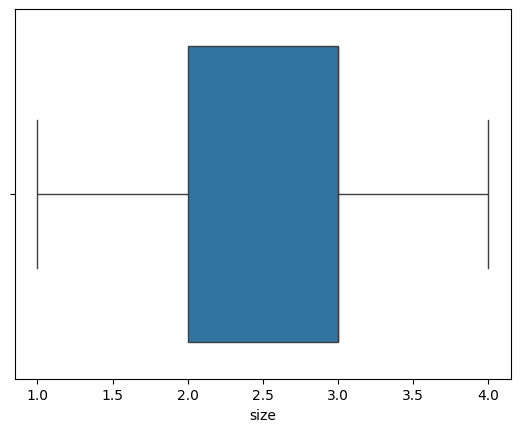

In [27]:
df['size'] = remove_outliers(df['size'])
sns.boxplot(x=df['size'])
plt.show()

In [28]:
df.isnull().sum()

location             0
size               835
total_sqft           0
bath                 0
price                0
Price_per_sqft    1265
dtype: int64

In [29]:
df.dropna(inplace = True)

In [30]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
Price_per_sqft    0
dtype: int64

In [31]:
df

,location,size,total_sqft,bath,price,Price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,39.07,0.036998
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00,0.046154
2,Uttarahalli,3.0,1440.0,2.0,62.00,0.043056
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00,0.062459
4,Kothanur,2.0,1200.0,2.0,51.00,0.042500
...,...,...,...,...,...,...
13314,Green Glen Layout,3.0,1715.0,3.0,112.00,0.065306
13316,Richards Town,4.0,3600.0,5.0,400.00,0.111111
13317,Raja Rajeshwari Nagar,2.0,1141.0,2.0,60.00,0.052585
13318,Padmanabhanagar,4.0,4689.0,4.0,488.00,0.104073


In [32]:
X = df[['size','total_sqft', 'bath','Price_per_sqft' ]]
y = df['price']   #Spliting the dataset

In [33]:
X

,size,total_sqft,bath,Price_per_sqft
0,2.0,1056.0,2.0,0.036998
1,4.0,2600.0,5.0,0.046154
2,3.0,1440.0,2.0,0.043056
3,3.0,1521.0,3.0,0.062459
4,2.0,1200.0,2.0,0.042500
...,...,...,...,...
13314,3.0,1715.0,3.0,0.065306
13316,4.0,3600.0,5.0,0.111111
13317,2.0,1141.0,2.0,0.052585
13318,4.0,4689.0,4.0,0.104073


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42 )

In [35]:
model = LinearRegression() #Training The Model

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

In [38]:
mse = mean_squared_error(y_test, y_pred)

In [39]:
 r_squared = r2_score(y_test, y_pred) # Evaluating the model using MSE, R-Square and Cross Validation

In [40]:
cv = np.mean(cross_val_score(model, X, y, cv=5))

In [41]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r_squared}')
print(f'Cross Validation Score: {cv}')

Mean Squared Error (MSE): 764.3991336999508
R-squared: 0.8344041023140407
Cross Validation Score: 0.7637090338437835
